# <div  style="text-align:center;border-radius:50px;padding:18px;background-color:#02b6f7;color:#FFFFFF;font-family:'Elephant'">Welcome To PetroAnalyst Competition </div>

# **SECTION 01: Competition Rules**

> * The use of **artificial intelligence** is prohibited. Anyone who uses it will be subject to exclusion.
>
> * Anyone who is **one day late** in submitting the notebook will have two points deducted. If it is **more than one day late or if it is not submitted at all**, he will be subject to exclusion.
>
> * Accepted participants to Second Stage will be announced **two days after** the end of the first stage.
>
> * Any addition, whether a question & answer or a comment on their answer, will earn the person **bouns points**.
>
> * There are **points on the format of the answer and the shape of the plots** to make them more clear.
>
> * Send Your Notebook with name **'Notebook_01_Comptitor_Name'**. For Example **'Notebook_01_Mahmoud_Mohamed'**

# **SECTION 02: Competition Stages**

> * **Stage One**: Well logging and Core Analysis
>
> * **Stage Two**: Survey Data and Decline Curve Analysis
>
> * **Stage Three**: Streamlit Application

# **SECTION 03: Notebook 01**

In this notebook, we take a brief vision on some important topics in oil and gas industry including:
* Well Logging

* Core Analysis

* LAS File 

* Lasio & Welly Python Package

#### Recommended Links:
* Lasio Documentation Webpage [click here](https://lasio.readthedocs.io/)

* Welly Documentation Webpage [click here](https://code.agilescientific.com/welly/)

* Well Logging Overview [click here](https://www.petrosync.com/blog/well-log-interpretation/)

* LAS File Structure [click here](https://esd.halliburton.com/support/LSM/GGT/ProMAXSuite/ProMAX/5000/5000_8/Help/promax/las_overview.pdf)

* Core Analysis Overview [click here](https://www.japex.co.jp/en/technology/techservice/svccore/)

# <div  style="text-align:center;border-radius:0px;padding:18px;background-color:#000000;color:#FFFFFF;font-family:'ARIAL BOLD'">PART 01</br></br>Well Logging </div>

# Creating Scatterplots (Crossplots) of Well Log Data


## Introduction

We will work with LAS files. These files hold key subsurface information, such as porosity and gamma ray logs, crucial for reservoir evaluation. Get ready to explore, analyze, and interpret real-world well data!

Scatterplots are a commonly used data visualisation tool to allow us to identify and determine if there is a relationship between two variables. We will also be able to tell if that relationship is a strong one or if there is no relationship.

Within petrophysics scatterplots, or crossplots, are routinely used as part of the interpretation workflow. They allow us to determine key interpretation parameters such as 

- clay and shale end points for our clay or shale volume calculations
- outlier detection
- lithology identification
- hydrocarbon identification
- rock typing
- regression analysis
- and more

## **Exercise 01**: Importing Libraries and Loading LAS Data


The data we are using for this short notebook comes from the publicly released Equinor Volve dataset. Details of which can be found [here](https://www.equinor.com/en/what-we-do/digitalisation-in-our-dna/volve-field-data-village-download.html)

you can read about lasio docs [Docs](https://lasio.readthedocs.io/en/latest/).

**Use File** '15-9-19_SR_COMP.LAS'

In [37]:
import pandas as pd
import numpy as np
import lasio
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings("ignore")

In [38]:
las = lasio.read("15-9-19_SR_COMP.LAS")

## **Exercise 02**: The next step is to convert out las file into a pandas dataframe.
Use method which will give us information about the data contained within it.

In [39]:
df= las.df()
df.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


*I found an error in the arrangement of the data so, we can apply reset index.*

In [40]:
df = df.reset_index()
df.head()

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
1,3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
2,3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3,3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
4,3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DEPT,6701.0,4125.9740000000,294.8263967472,3615.4340,3870.704000,4125.9740,4381.244000,4636.5140
AC,6579.0,78.3136072503,17.0095347374,1.0251,66.169300,74.1459,89.024250,149.2187
CALI,6579.0,9.5506555708,0.9062667760,6.0000,9.142900,9.5238,9.904800,20.2857
DEN,6656.0,2.4592914964,0.1626815280,2.0377,2.341250,2.5142,2.589800,3.0013
GR,6689.0,36.0485625953,26.7055193302,2.7661,14.852300,32.1426,50.901700,304.3337
NEU,6668.0,17.9860612627,11.6940838788,2.1783,10.244475,15.2451,22.952525,146.3474
RDEP,6701.0,3.2210119534,8.8603872708,0.2503,0.800600,1.7700,3.394000,198.5371
RMED,6701.0,3.0812613491,6.3067411738,0.2947,0.844800,1.8014,3.537300,115.6350


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6701 entries, 0 to 6700
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPT    6701 non-null   float64
 1   AC      6579 non-null   float64
 2   CALI    6579 non-null   float64
 3   DEN     6656 non-null   float64
 4   GR      6689 non-null   float64
 5   NEU     6668 non-null   float64
 6   RDEP    6701 non-null   float64
 7   RMED    6701 non-null   float64
dtypes: float64(8)
memory usage: 418.9 KB


***After checking for null values, we found a small number compared to the original data count.***
***We have two options (delete the nulls) or (fill the nulls).***

In [43]:
df.isnull().sum()

DEPT      0
AC      122
CALI    122
DEN      45
GR       12
NEU      33
RDEP      0
RMED      0
dtype: int64

*Our data has been cleaned from nulls.*

In [44]:
df = df.dropna()
df.isnull().sum()

DEPT    0
AC      0
CALI    0
DEN     0
GR      0
NEU     0
RDEP    0
RMED    0
dtype: int64

In [45]:
dataAI = df
df.head()

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
1,3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
2,3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3,3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
4,3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


*Change some names to be understandable to me.*

In [46]:
df=df.rename(columns={'DEPT':'Depth','DEN':'Density','GR':'Gamma Ray','NEU':'Neutron Porosity'})
df.head()

,Depth,AC,CALI,Density,Gamma Ray,Neutron Porosity,RDEP,RMED
0,3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
1,3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
2,3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3,3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
4,3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


## **Exercise 03**: Creating a Crossplot / Scatterplot
Now that we have our data loaded, we can begin creating our first scatterplot/crossplot of our logging data, in particular, we will use the density and neutron porosity measurements. These two measurements are often plotted like this and can tell us a number of different things about the intervals logged, including hydrocarbon presence, lithology, and bad data etc. </br>**Make it in prefect form (the more good your chart the more points you will get)**

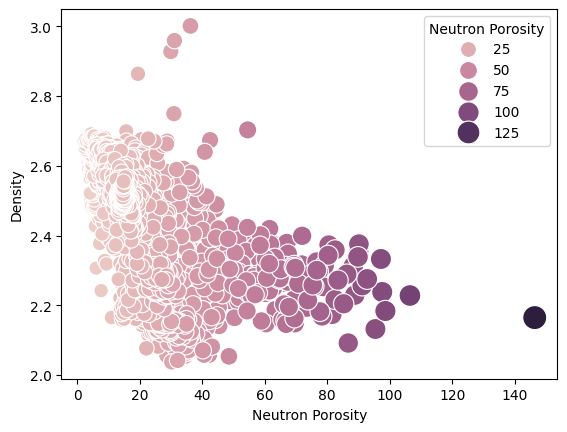

In [47]:
#Scatterplot with points sorted by Neutron Porosity
#============================================
sns.scatterplot(x = 'Neutron Porosity', y = 'Density', data=df,hue='Neutron Porosity',size='Neutron Porosity',sizes=(100, 300),)
plt.xlabel('Neutron Porosity')
plt.ylabel('Density')
plt.legend(title='Neutron Porosity')
plt.show()
#============================================

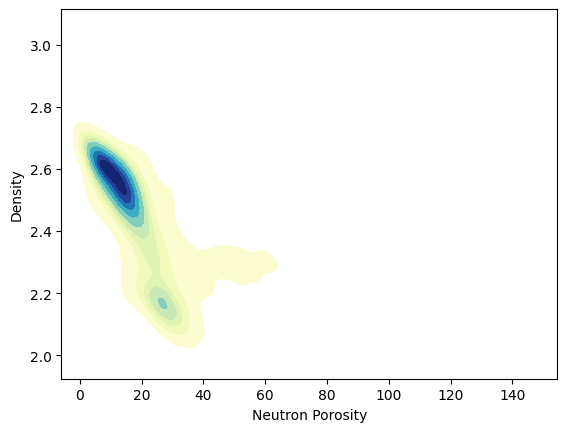

In [48]:
#KDE plot to highlight areas with a high density of points
#============================================
sns.kdeplot(data = df, x='Neutron Porosity',y='Density', cmap='YlGnBu',fill=True)
plt.xlabel('Neutron Porosity')
plt.ylabel('Density')
plt.show()
#============================================

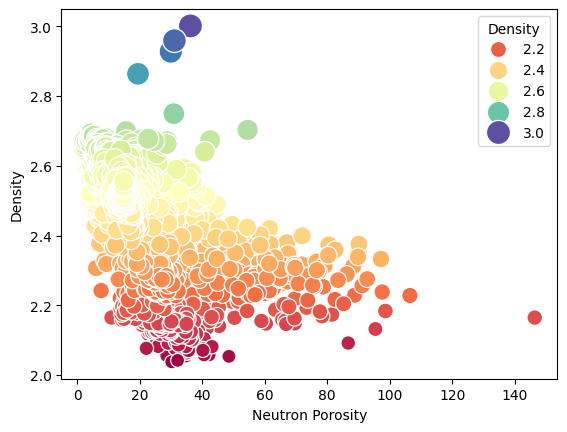

In [49]:
#Scatterplot with points sorted by Density
#============================================
sns.scatterplot(x='Neutron Porosity',y='Density',data=df,hue='Density',palette='Spectral',size='Density',sizes=(100, 300))
plt.xlabel('Neutron Porosity')
plt.ylabel('Density')
plt.legend(title='Density')
plt.show()
#============================================

## **Exercise 04**: Find best way to add third variable ('GR') to the crossplot/scatterplot
change range of x =(-5, 60) and y=(3.0, 1.5)
</br>**Make it in prefect form (the more good your chart the more points you will get)**

*We have a problem here with the 3D scatterplot and we will try to solve it.*

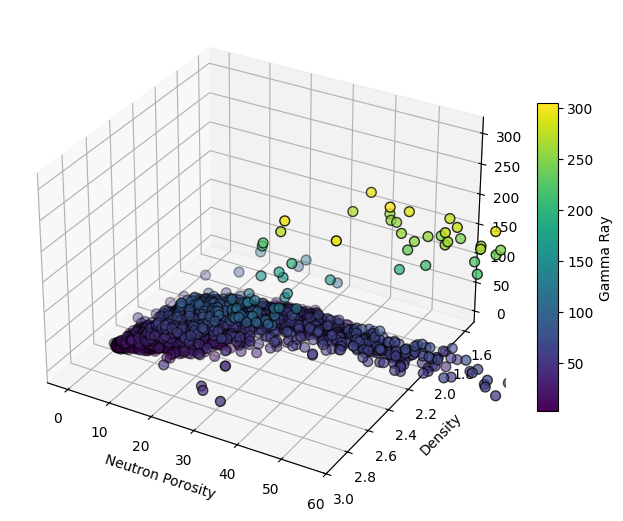

In [50]:
#variables including the third one
x = df['Neutron Porosity']
y = df['Density']
z = df['Gamma Ray']
#3D scatterplot
#============================================
figShape = plt.figure(figsize = (8, 8))
axis = plt.axes(projection ="3d")
#============================================
#new range of x and y
plt.xlim(-5, 60)
plt.ylim(3.0, 1.5)
#============================================ 
scatt = axis.scatter3D(x, y, z,c=z,cmap='viridis',edgecolor='k',s=50)
plt.xlabel('Neutron Porosity')
plt.ylabel('Density')
figShape.colorbar(scatt, ax=axis, shrink=0.5, aspect=15, label="Gamma Ray")
plt.show()
#============================================

*Check the values, and then we can draw a 3D scatter plot without any abnormalities.*

In [51]:
df[['Gamma Ray','Neutron Porosity','Density']].describe().T

,count,mean,std,min,25%,50%,75%,max
Gamma Ray,6579.0,35.8140454628,26.8484755201,2.7661,14.56730,31.7064,50.76700,304.3337
Neutron Porosity,6579.0,17.9894281198,11.7709955047,2.1783,10.15665,15.1588,23.10330,146.3474
Density,6579.0,2.4595123271,0.1635235317,2.0377,2.33915,2.5154,2.59045,3.0013


*We found 312 values ​​in Gamma Ray and 37 in Neutron Porosity, We will exclude them to fix the shape.*

In [52]:
df[df[['Gamma Ray','Neutron Porosity','Density']] > 70 ].count()

Depth                 0
AC                    0
CALI                  0
Density               0
Gamma Ray           312
Neutron Porosity     37
RDEP                  0
RMED                  0
dtype: int64

In [53]:
dataAfterEdit = df[df[['Gamma Ray','Neutron Porosity','Density']]< 70]
x = dataAfterEdit['Neutron Porosity']
y = dataAfterEdit['Density']
z = dataAfterEdit['Gamma Ray']

*Now we can plot without problems.*

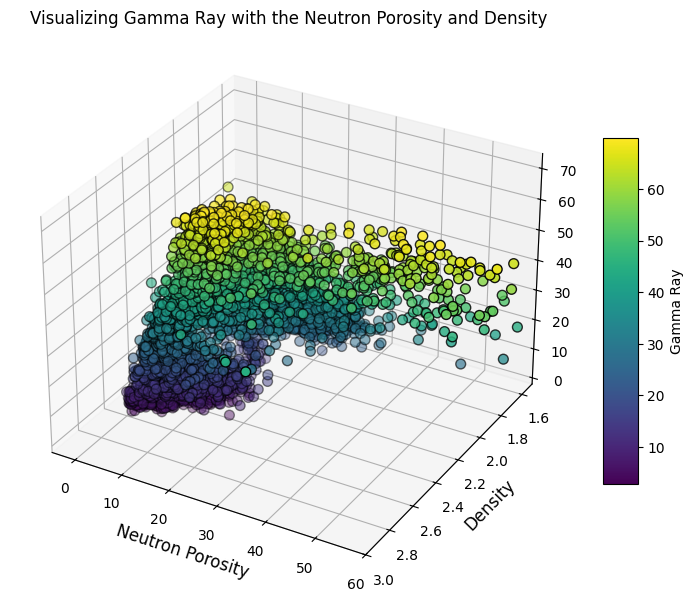

In [54]:
#3D scatterplot
#============================================
figShape = plt.figure(figsize = (9, 9))
axis = plt.axes(projection ="3d")
#============================================
#new range of x and y
plt.xlim(-5, 60)
plt.ylim(3.0, 1.5) 
#============================================
scatt = axis.scatter3D(x, y, z,c=z,cmap="viridis",edgecolor='k',s=50)
plt.xlabel("Neutron Porosity", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title('Visualizing Gamma Ray with the Neutron Porosity and Density')
figShape.colorbar(scatt, ax=axis, shrink=0.5, aspect=10, label="Gamma Ray")
plt.show()
#============================================

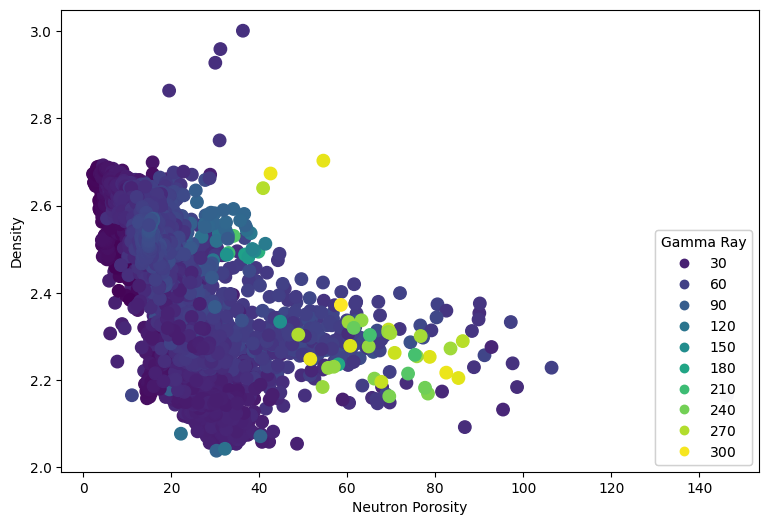

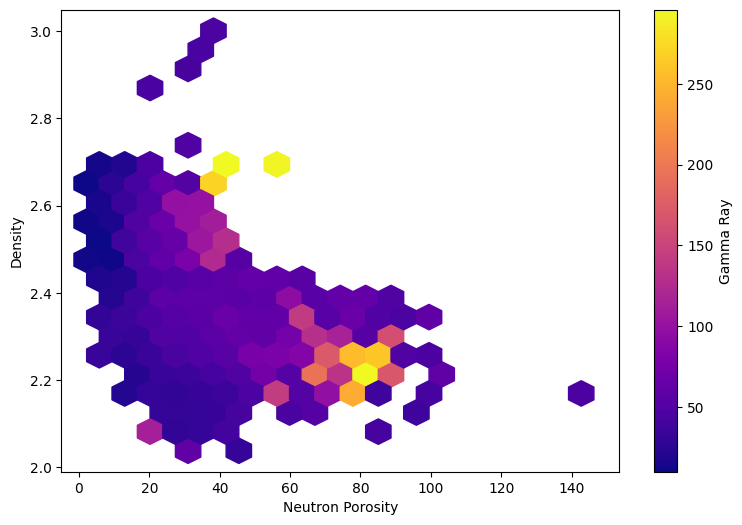

In [55]:
#Variables including the third one
#============================================
x = df['Neutron Porosity']
y = df['Density']
z = df['Gamma Ray']
#scatterplot 2D
#============================================
figShape, axis = plt.subplots( figsize = (9,6))
scatter = axis.scatter(x, y, c = z , cmap = 'viridis' , s = 80)
legend = axis.legend(*scatter.legend_elements(), loc="lower right",title="Gamma Ray")
axis.add_artist(legend)
axis.set_xlabel('Neutron Porosity')
axis.set_ylabel('Density')
plt.show()
#hexplot 2D
#============================================
figShape, axis = plt.subplots(figsize=(9, 6))
hexbin = axis.hexbin( x= x, y= y, C= z, gridsize = 20,cmap = 'plasma' )      
axis.set_xlabel('Neutron Porosity')
axis.set_ylabel('Density')
cb = figShape.colorbar(hexbin, ax=axis, label='Gamma Ray')
plt.show()
#============================================

## **Exercise 05**: Create one plot have 3 subplots in
* Subplot 1: between Gamma Ray and Depth

* Subplot 2: between Deep Resistivity and Depth

* Subplot 3: between (Bulk Density and Depth) and (Neutron Porosity and Depth)

</br>**Make it in prefect form (the more good your chart the more points you will get)**

In [56]:
df.head()

,Depth,AC,CALI,Density,Gamma Ray,Neutron Porosity,RDEP,RMED
0,3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
1,3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
2,3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3,3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
4,3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


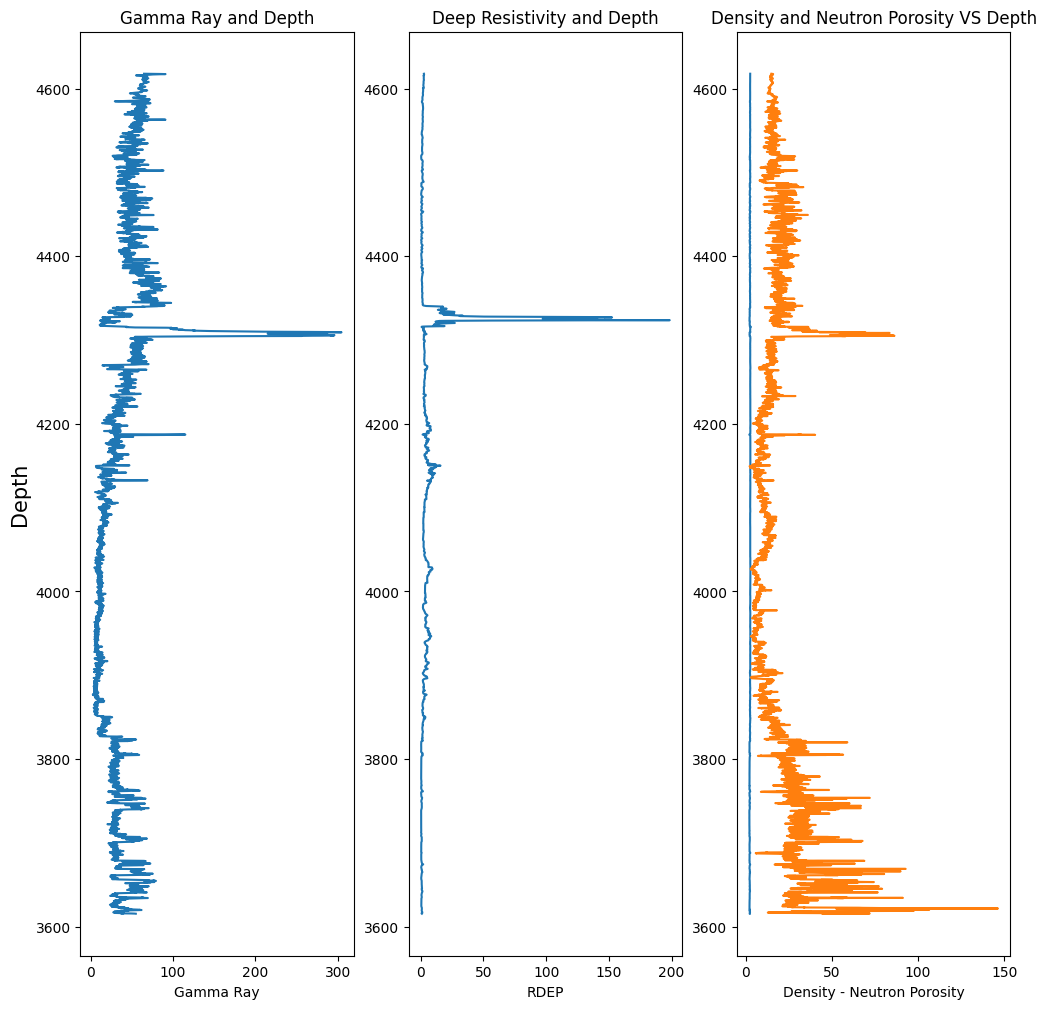

In [57]:
#List of items and titles in the data to use in a for loop
#============================================
plotlist = ['Gamma Ray', 'RDEP', ['Density', 'Neutron Porosity']]
titles = ['Gamma Ray and Depth','Deep Resistivity and Depth']
#============================================
plt.figure(figsize=(12, 12))
for i in range(len(plotlist)):
#Subplot3: between (Bulk Density and Depth) and (Neutron Porosity and Depth)
#============================================
    if plotlist[i] == plotlist[2]:
        plt.subplot(1, 3, i + 1)
        plt.plot(df[plotlist[i][0]], df['Depth'], label='Density')
        plt.plot(df[plotlist[i][1]], df['Depth'], label='Neutron Porosity')
        plt.title(f'{plotlist[i][i-2]} and {plotlist[i][i-1]} VS Depth')
        plt.xlabel(f'{plotlist[i][0]} - {plotlist[i][1]}')
#Subplot 1,2: between Gamma Ray,Deep Resistivity ,and Depth
#============================================
    else:
        plt.subplot(1, 3, i + 1)
        plt.plot(df[plotlist[i]], df['Depth'])
        plt.title(f"{titles[i]}")
        plt.xlabel(f'{plotlist[i]}')
        if plotlist[i] == 'Gamma Ray':
         plt.ylabel('Depth',fontsize=15)
plt.show()
#============================================

## **Exercise 06**: Write Your suggested Comment on the previous plot 'Exercise 05'
**You must answer this question.**

In [58]:
#Subplot 1: it Shows gamma ray readings with depth. High values ​​indicate the presence of shale 
### and the low values indicate to sandstone. A high increase can also be observed
### between 4200 and 4400, which indicates to shale.
#############################################################################################
#Subplot 2: it shows resistance measurements with depth. High resistivity values ​​may indicate
### the presence of oil or gas, while low values ​​indicate areas saturated with water.
#############################################################################################
#Subplot 3: it shows Comparison between the density and the neutron porosity with depth.
### The values ​​are indicate used to determine rock type and fluid content.
#############################################################################################

*Note: I'm not an expert in (Well drilling). These writings are based on an online session with Eng. Ali and search by Google.*

# <div  style="text-align:center;border-radius:0px;padding:18px;background-color:#000000;color:#FFFFFF;font-family:'ARIAL BOLD'">PART 02</br></br>Core Analysis</div>

## **Exercise 07**: Importing Libraries and Load Data
**Use File** '115_9-19A-CORE.csv'

In [59]:
df = pd.read_csv('15_9-19A-CORE.csv')

In [60]:
df.head()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN
1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN
2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN
3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN
4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68


In [61]:
df.isnull().sum()

DEPTH          0
OrigDepth      0
CORE_NO        0
SAMPLE         0
CKHG         171
CKHL         171
CKVG         587
CKVL         587
CPOR         135
CPORV        657
So           657
Sw           657
CGD          134
CGDV         657
dtype: int64

## **Exercise 08**: Creating the Figure With Subplots
* subplot1:show CPOR (Core Porosity) vs DEPTH

* subplot2:show CKHG (Core Permeability) vs DEPTH

* subplot3:show CPOR (Core Porosity) vs CKHG (Core Permeability)

* subplot4:show a histogram of CPOR - Core Porosity

* subplot5:show a histogram of CGD - Core Grain Density

</br>**Make it in prefect form (the more good your chart the more points you will get)**

In [62]:
df.head()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN
1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN
2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN
3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN
4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68


In [63]:
###  To use it in Exercie 9  ###
newdepth = df['DEPTH']
Cpor = df['CPOR']

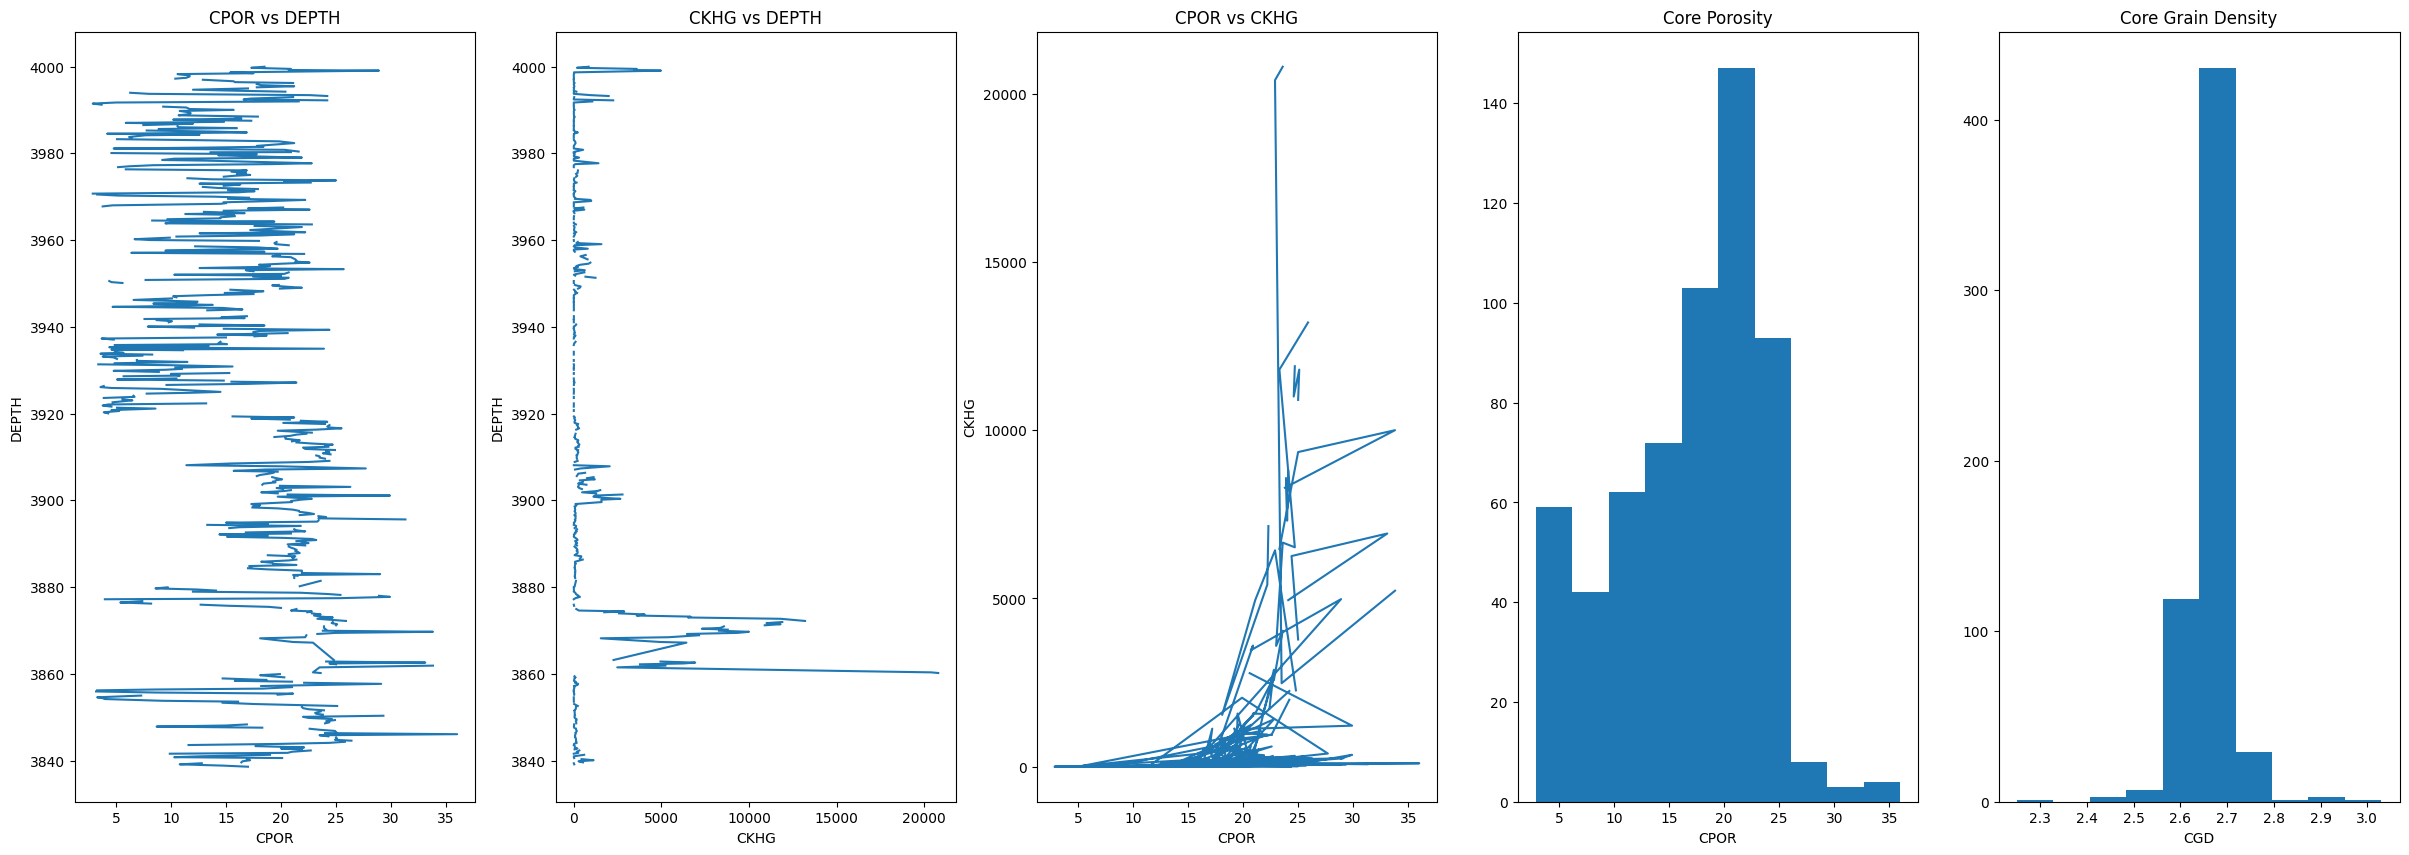

In [64]:
# Prepare a lists of x and y and titles
plotlist_x = ['CPOR', 'CKHG', 'CPOR']
plotlist_y = ['DEPTH','DEPTH','CKHG']
titles = ['CPOR vs DEPTH','CKHG vs DEPTH','CPOR vs CKHG']
#Start Plotting
#########################
plt.figure(figsize=(30, 10))
#subplot 1, 2, 3
#########################
for i in range(len(plotlist_x)):
    plt.subplot(1, 5, i + 1)
    plt.plot(df[plotlist_x[i]], df[plotlist_y[i]])
    plt.title(f"{titles[i]}")
    plt.xlabel(f'{plotlist_x[i]}')
    plt.ylabel(f'{plotlist_y[i]}')   
#subplot 4, 5 
#########################   
plt.subplot(1, 5,4)  
plt.hist(df['CPOR'])
plt.title("Core Porosity")
plt.xlabel('CPOR')
plt.subplot(1, 5,5)  
plt.hist(df['CGD'])
plt.title("Core Grain Density")
plt.xlabel('CGD')
plt.show()

## **Exercie 09**: Adding Interpreted Data as Line Plots
create a plot that includes:

* A scatter plot showing raw core porosity (CPOR) against depth (Exercise 08).

* A continuous line plot showing interpreted porosity (PHIF) from the LAS data.

**Use file** ('15_9-19_A_CPI.las')

In [65]:
las = lasio.read("15_9-19_A_CPI.las")

Only engine='normal' can read wrapped files


In [66]:
df= las.df()
df = df.reset_index()
df.head()

,DEPTH,BS,BVW,CARB_FLAG,COAL_FLAG,DELTA,GRMAX,GRMIN,J,KLHC_INT,...,PHIF,PORD,RHOFL,RHOMA,RW,SAND_FLAG,SW,SWIRR,TEMP,VSH
0,3666.5916,8.5,0.111705,0.0,0.0,0.1475,115.0,14.0,0.000163,0.0003,...,0.199843,0.199843,0.8,2.66,0.0216428,0.0,0.5590,1.8023,112.7249,0.598800
1,3666.7440,8.5,0.112236,0.0,0.0,0.3583,115.0,14.0,0.000003,0.0000,...,0.218743,0.218743,0.8,2.66,0.0216422,0.0,0.5131,7.9467,112.7285,0.599555
2,3666.8964,8.5,0.114825,0.0,0.0,0.1298,115.0,14.0,0.000004,0.0000,...,0.242380,0.242380,0.8,2.66,0.0216416,0.0,0.4737,6.5907,112.7321,0.600310
3,3667.0488,8.5,0.114419,0.0,0.0,0.2489,115.0,14.0,0.000002,0.0000,...,0.226408,0.226408,0.8,2.66,0.0216410,0.0,0.5054,8.6274,112.7358,0.601065
4,3667.2012,8.5,0.115867,0.0,0.0,0.2072,115.0,14.0,0.000004,0.0000,...,0.216169,0.216169,0.8,2.66,0.0216404,0.0,0.5360,6.8473,112.7394,0.601820


***A scatter plot between porosity (CPOR) against depth from Exercise 08***

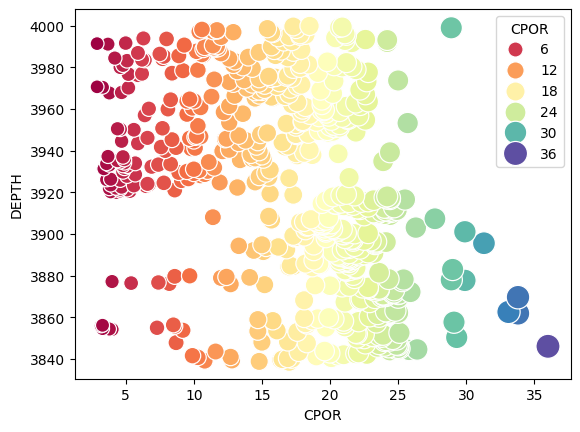

In [67]:
# Scatterplot
####################################
sns.scatterplot(x = Cpor, y = newdepth ,hue=Cpor,palette='Spectral',size=Cpor,sizes=(100, 300),)
plt.xlabel('CPOR')
plt.ylabel('DEPTH')
plt.legend(title='CPOR')
plt.show()
####################################

***A continuous line plot showing interpreted porosity (PHIF) from the LAS data***

<Axes: title={'center': 'interpreted porosity (PHIF)'}, ylabel='PHIF'>

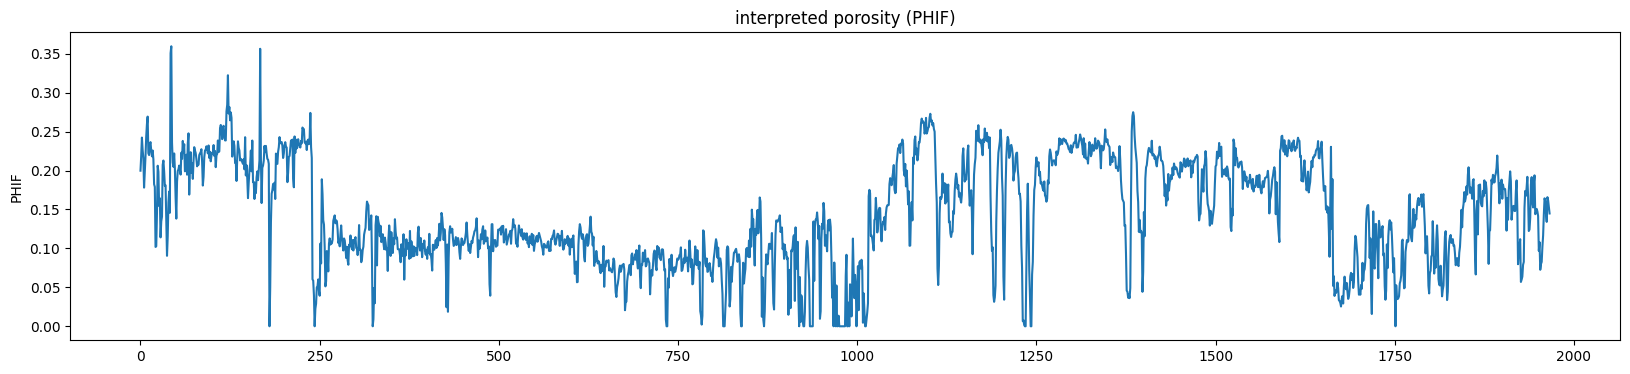

In [68]:
plt.figure(figsize=(20, 4))
plt.title("interpreted porosity (PHIF)")
plt.ylabel('PHIF')
df['PHIF'].plot()

***A continuous line plot showing interpreted porosity (PHIF) with added Depth axis***

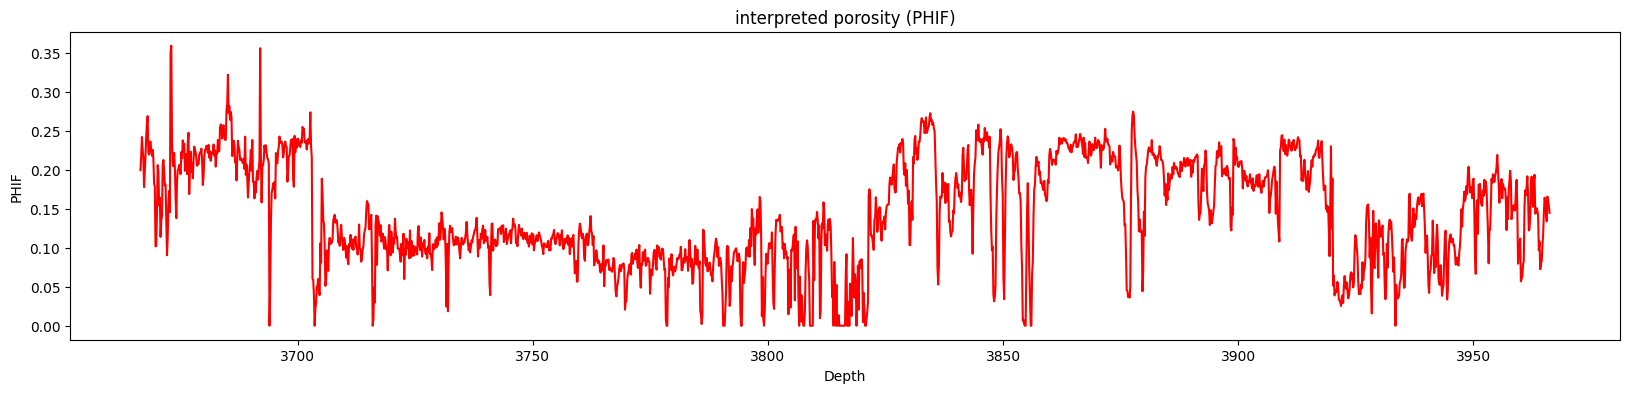

In [69]:
plt.figure(figsize=(20, 4))
plt.plot(df['DEPTH'], df['PHIF'],color='red')
plt.title("interpreted porosity (PHIF)")
plt.xlabel('Depth')
plt.ylabel('PHIF')
plt.show() 

# <div  style="text-align:center;border-radius:0px;padding:18px;background-color:#000000;color:#FFFFFF;font-family:'ARIAL BOLD'">PART 03</br></br>Welly Multi Well Project </div>

you can read docs of welly from [docs](https://code.agilescientific.com/welly/)

## **Exercise 10**: Import libraries and Loading wells using Project
**Use all las files** in 'welly_data' folder

In [72]:
import welly
from welly import Well
from glob import glob

In [73]:
allwells = welly.read_las("C:\\Users\\PC\\Desktop\\Stage 01\\welly_data\\*.las")

4it [00:02,  1.34it/s]


## **Exercise 11**: Print individual well details

*For Wells*

In [75]:
for i in range(len(allwells)):
    print(f'Describe For Well: {i+1}')
    print(allwells[i])
    print('=============================================')

Describe For Well: 1
Well(uwi: 'L05-B-01', name: 'L05-B-01', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])
Describe For Well: 2
Well(uwi: 'L06-06', name: 'L06-06', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])
Describe For Well: 3
Well(uwi: 'L06-07', name: 'L06-07', 5 curves: ['GR', 'DT', 'RHOB', 'DRHO', 'NPHI'])
Describe For Well: 4
Well(uwi: 'L07-01', name: 'L07-01', 4 curves: ['GR', 'DT', 'RHOB', 'NPHI'])


In [76]:
for i in range(len(allwells)):
    print(f'header For Well: {i+1}')
    print(allwells[i].header)
    print('=============================================')

header For Well: 1
   original_mnemonic mnemonic  unit               value  \
0               VERS     VERS                       2.0   
1               WRAP     WRAP                        NO   
2               STRT     STRT     M                81.0   
3               STOP     STOP     M           4879.7006   
4               STEP     STEP     M                 0.1   
5               NULL     NULL                   -999.25   
6               WELL     WELL                  L05-B-01   
7                FLD      FLD                        L5   
8               CNTY     CNTY        GLOMAR ADRIATIC XI   
9               STAT     STAT               NETHERLANDS   
10              CTRY     CTRY               NETHERLANDS   
11               LOC      LOC                 NORTH SEA   
12               API      API                             
13               UWI      UWI                  L05-B-01   
14              DATE     DATE               16-Feb-2002   
15              COMP     COMP        

In [77]:
for i in range(len(allwells)):
    print(f'location For Well: {i+1}')
    print(allwells[i].location)
    print('=============================================')

location For Well: 1
Location({'position': None, 'crs': CRS({}), 'location': 'NORTH SEA', 'country': 'NETHERLANDS', 'state': 'NETHERLANDS', 'county': 'GLOMAR ADRIATIC XI', 'latitude': 53.705031, 'longitude': 4.603479, 'api': '', 'ekb': 40.0, 'tdd': 4906.0, 'td': None, 'deviation': None})
location For Well: 2
Location({'position': None, 'crs': CRS({}), 'location': '', 'country': '', 'state': '', 'county': '', 'latitude': 53.808408, 'longitude': 4.672192, 'api': '', 'tdd': 5605.0, 'tdl': 5605.0, 'td': None, 'deviation': None})
location For Well: 3
Location({'position': None, 'crs': CRS({}), 'location': '', 'country': '', 'state': '', 'county': '', 'latitude': 53.706549, 'longitude': 4.898703, 'api': '', 'tdd': 4865.0, 'tdl': 4865.0, 'td': None, 'deviation': None})
location For Well: 4
Location({'position': None, 'crs': CRS({}), 'location': '', 'country': '', 'state': '', 'county': '', 'latitude': 53.722768, 'longitude': 4.796468, 'api': '', 'egl': -36.0, 'tdd': 3934.0, 'tdl': 3934.0, 'td

# **Plotting Curves from Multiple Wells**

## **Exercise 12**: Plot GR and DEPTH from all wells in one plot
</br>**Make it in prefect form (the more good your chart the more points you will get)**

In [78]:
# Get the path to use in the for loop
#########################################
path = 'C:\\Users\\PC\\Desktop\\Stage 01\\welly_data'
files = glob(path + '/*.las')
newdf=[]
#########################################
for i in files:
   las = welly.read_las(i)
   df = las.df()
   df = df.reset_index()
   newdf.append(df)
   print(f'Number of Data {files.index(i) + 1}:  {len(df)}')
   print('=========================') 
#########################################

1it [00:00,  1.28it/s]


Number of Data 1:  4799


1it [00:00,  1.07it/s]


Number of Data 2:  5570


1it [00:00,  1.16it/s]


Number of Data 3:  4857


1it [00:00,  1.68it/s]

Number of Data 4:  3864


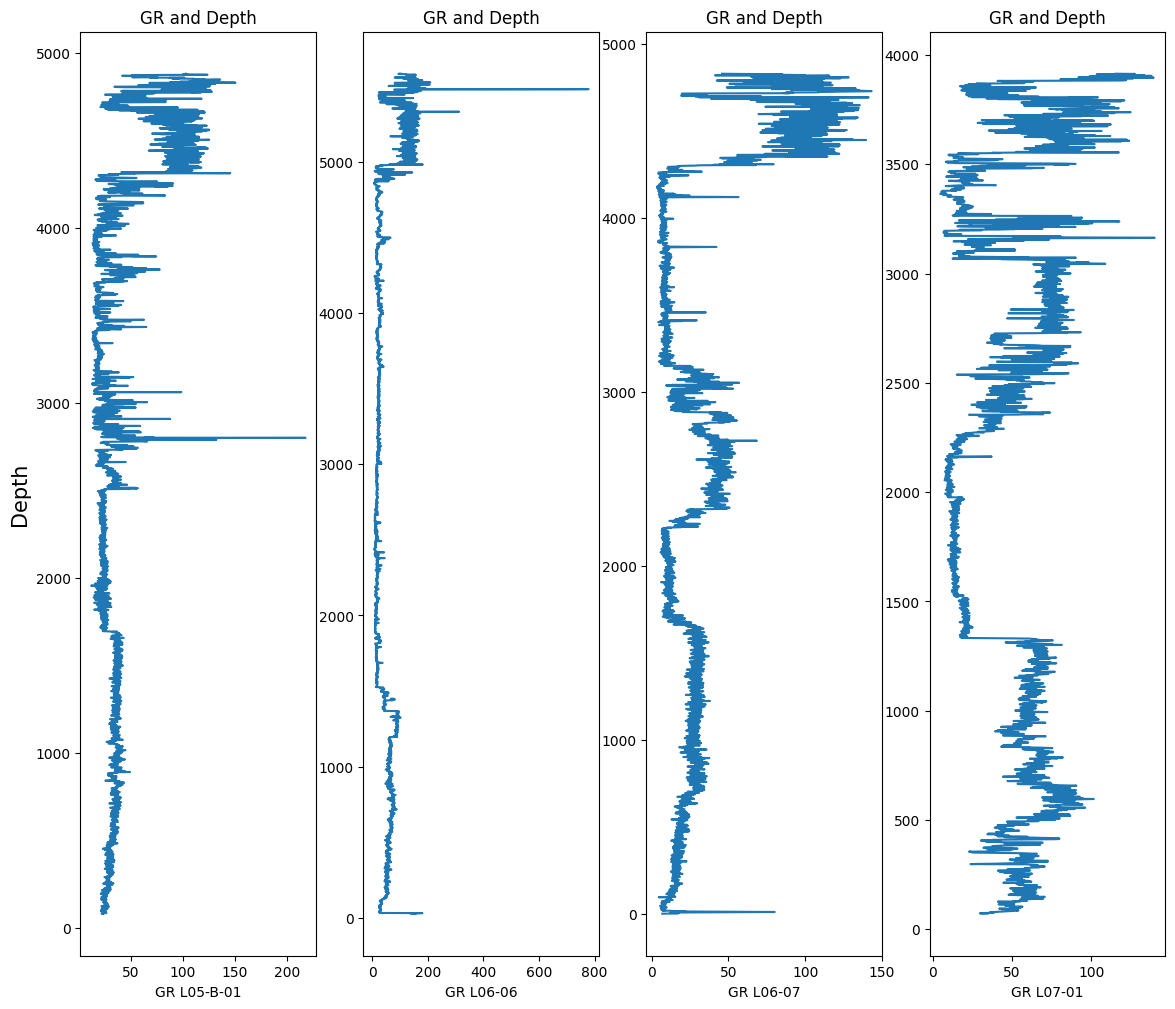

In [79]:
# Titles for the names of curves
titlesX= ['L05-B-01','L06-06','L06-07','L07-01']
plt.figure(figsize=(14, 12))
#########################################
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.title('GR and Depth')
  if i<1:
      plt.ylabel('Depth',fontsize=15) 
  plt.plot(newdf[i]['GR'], newdf[i]['DEPT'])
  plt.xlabel(f'GR {titlesX[i]}',fontsize=10)
plt.show()
#########################################

*All curves together on one axis.*

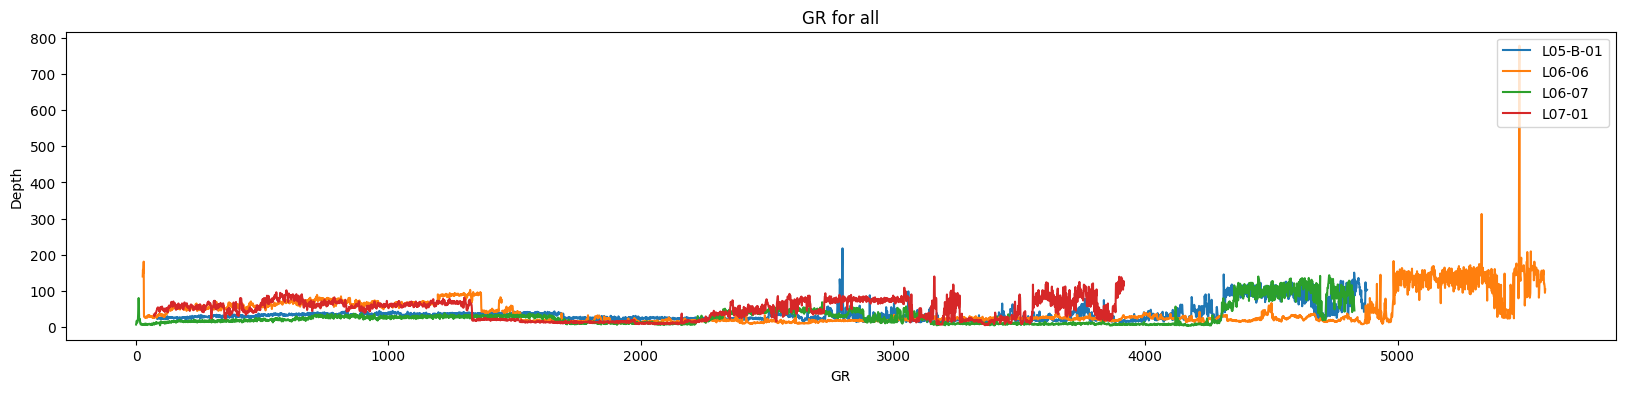

In [80]:
plt.figure(figsize=(20, 4))
curves = ['L05-B-01','L06-06','L06-07','L07-01']
for i in range(4):
  plt.subplot()
  if i<1:
      plt.ylabel('Depth',fontsize=10) 
      plt.xlabel('GR',fontsize=10)
  plt.plot(newdf[i]['DEPT'], newdf[i]['GR'],label=curves[i])
  plt.title('GR for all')
  plt.legend(loc='upper right')
plt.show()

## **Exercise 13**: Plot RHOB and DEPTH from all wells in one plot
</br>**Make it in prefect form (the more good your chart the more points you will get)**

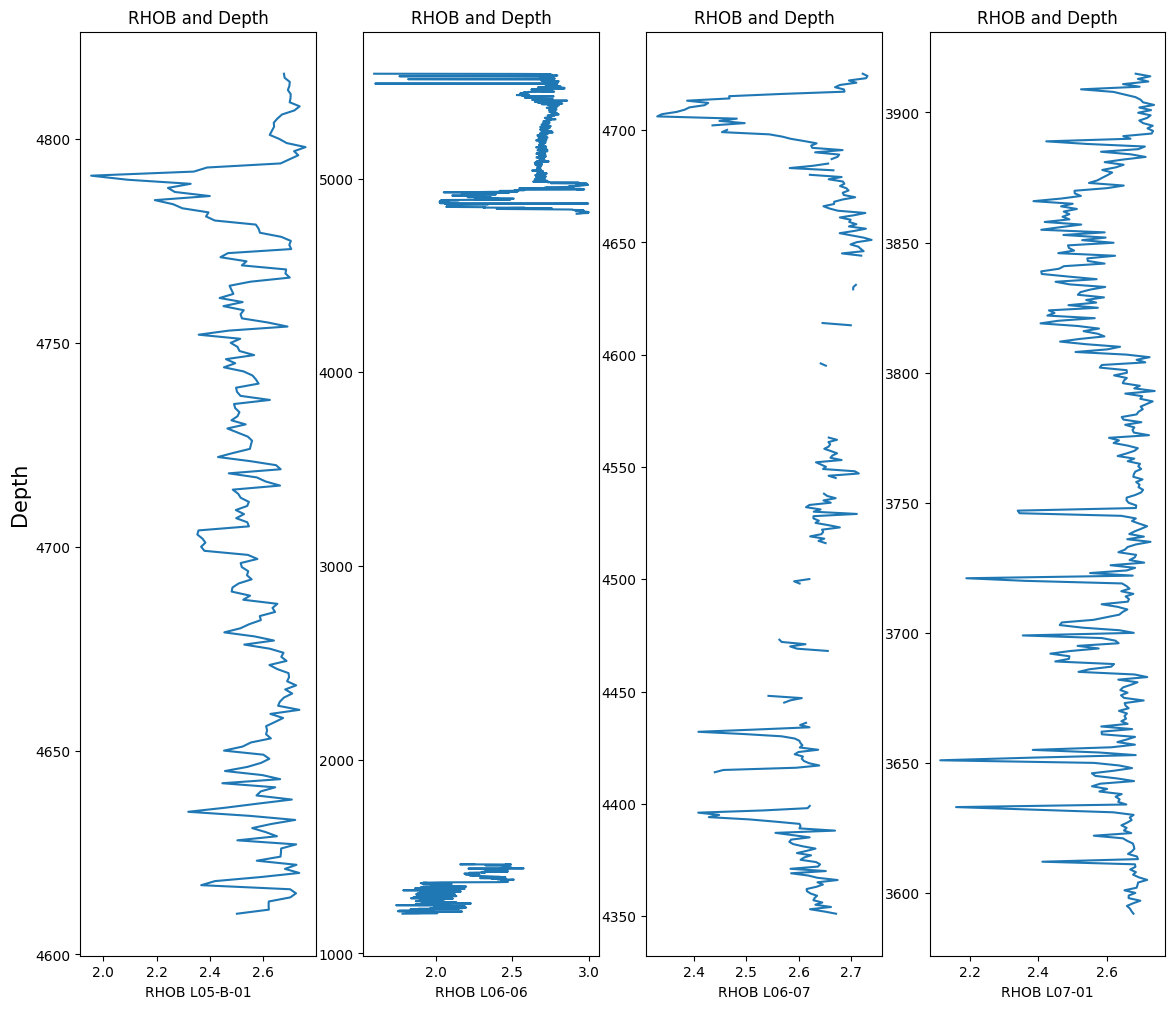

In [81]:
titlesX= ['L05-B-01','L06-06','L06-07','L07-01']
plt.figure(figsize=(14, 12))

for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.title('RHOB and Depth')
  if i<1:
      plt.ylabel('Depth',fontsize=15) 
  plt.plot(newdf[i]['RHOB'], newdf[i]['DEPT'])
  plt.xlabel(f'RHOB {titlesX[i]}',fontsize=10)
plt.show()

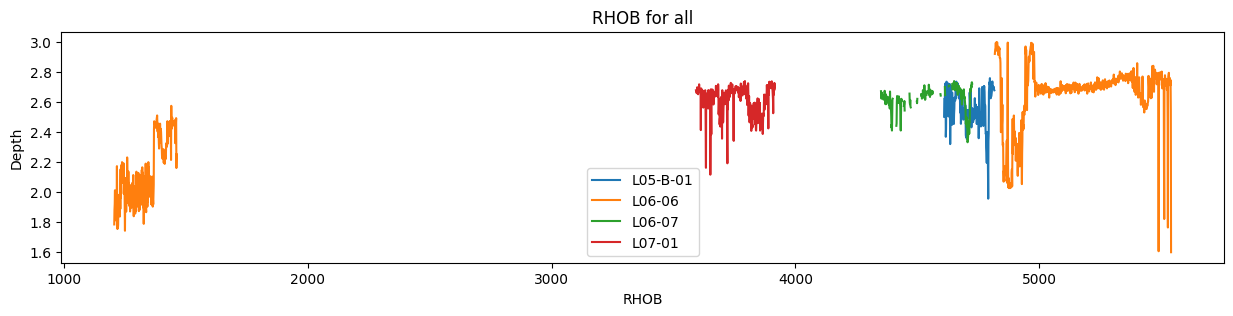

In [82]:
plt.figure(figsize=(15, 3))
curves = ['L05-B-01','L06-06','L06-07','L07-01']
for i in range(4):
  plt.subplot()
  if i<1:
      plt.ylabel('Depth',fontsize=10) 
      plt.xlabel('RHOB',fontsize=10)
  plt.plot(newdf[i]['DEPT'], newdf[i]['RHOB'],label=curves[i])
  plt.title('RHOB for all')
  plt.legend(loc='best')
plt.show()

# <div  style="text-align:center;border-radius:0px;padding:18px;background-color:#000000;color:#FFFFFF;font-family:'Elephant'">THANK YOU</br></br>SEE YOU IN THE NEXT STAGE </div>

# <div  style="text-align:center;border-radius:0px;padding:18px;background-color:#7E1891;color:#FFFFFF;font-family:'Elephant'">EXTRA PART</br></br>BUILD MODEL AI</br></br>BASED ON Well drilling DATA </div>

## Import libraries

In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

***We already have data that was cleaned before.***

In [84]:
dataAI.head()

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
1,3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
2,3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3,3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
4,3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


In [85]:
dataAI.describe().T

,count,mean,std,min,25%,50%,75%,max
DEPT,6579.0,4116.6776000000,289.4591176895,3615.4340,3866.05580,4116.6776,4367.29940,4617.9212
AC,6579.0,78.3136072503,17.0095347374,1.0251,66.16930,74.1459,89.02425,149.2187
CALI,6579.0,9.5506555708,0.9062667760,6.0000,9.14290,9.5238,9.90480,20.2857
DEN,6579.0,2.4595123271,0.1635235317,2.0377,2.33915,2.5154,2.59045,3.0013
GR,6579.0,35.8140454628,26.8484755201,2.7661,14.56730,31.7064,50.76700,304.3337
NEU,6579.0,17.9894281198,11.7709955047,2.1783,10.15665,15.1588,23.10330,146.3474
RDEP,6579.0,3.2570434413,8.9377923751,0.2503,0.79495,1.8136,3.40625,198.5371
RMED,6579.0,3.1178742666,6.3588223560,0.2947,0.84685,1.8495,3.58740,115.6350


*The best choice for prediction is AC(Acoustic Compressional Slowness) because it is useful for predicting rock properties such as porosity and hardness. It can also serve as an indicator of soft or hard rock layers.*

**First, we want to know the correlations between the variables**

In [86]:
sns.set(style="whitegrid")
dataAI.corr()

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,1.0000000000,-0.4022964608,-0.1718012691,0.3917779059,0.4138318000,-0.2985905777,0.0801267156,0.0816587126
AC,-0.4022964608,1.0000000000,0.0546589672,-0.8135546910,0.3314422567,0.7979608631,-0.0898409908,-0.1437442519
CALI,-0.1718012691,0.0546589672,1.0000000000,0.1290629984,-0.0422647229,0.0713612233,-0.0910566457,-0.0898393645
DEN,0.3917779059,-0.8135546910,0.1290629984,1.0000000000,-0.1772972409,-0.6980254988,0.0182924720,0.0747320988
GR,0.4138318000,0.3314422567,-0.0422647229,-0.1772972409,1.0000000000,0.5112193748,-0.1136983189,-0.1559212474
NEU,-0.2985905777,0.7979608631,0.0713612233,-0.6980254988,0.5112193748,1.0000000000,-0.1276305172,-0.1844104732
RDEP,0.0801267156,-0.0898409908,-0.0910566457,0.0182924720,-0.1136983189,-0.1276305172,1.0000000000,0.9682388196
RMED,0.0816587126,-0.1437442519,-0.0898393645,0.0747320988,-0.1559212474,-0.1844104732,0.9682388196,1.0000000000


Heatmap of the correlation matrix to identify the best features.

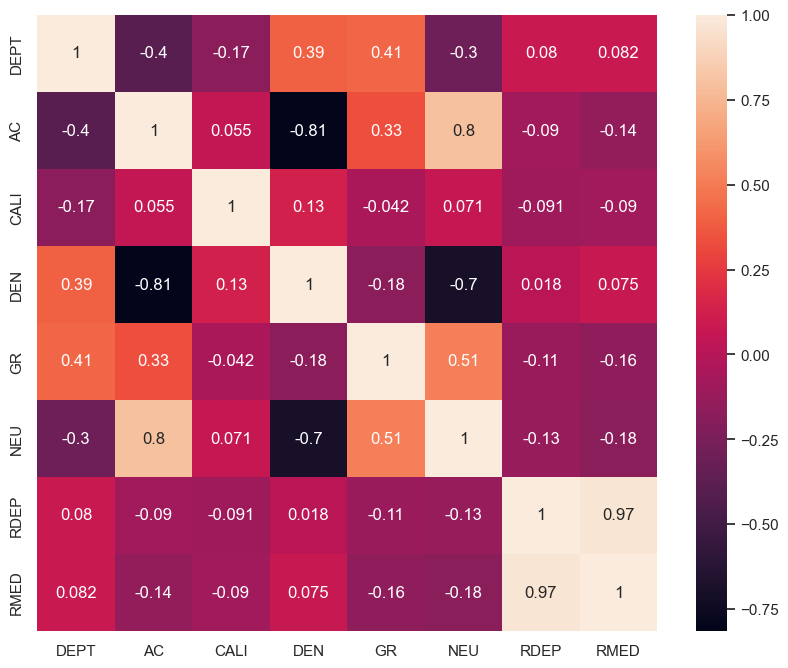

In [87]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataAI.corr(), annot=True)
plt.show()

**The top 3 features from the heatmap**
* *NEU: 0.8 (strong + correlation)*
* *DEN: -0.81 (strong - correlation)*
* *GR: 0.33 (medium + correlation)*

*Prepare (x , y)*

In [88]:
dataAI.head()

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
1,3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
2,3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3,3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
4,3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


In [89]:
X = dataAI.drop('AC',axis =1)
y = dataAI['AC']

*Split Data*

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4934, 7)
X_test shape is  (1645, 7)
y_train shape is  (4934,)
y_test shape is  (1645,)


*Train the model.*

In [91]:
Model = XGBRegressor(n_estimators = 500,max_depth=6,)
names = ['XGBoost']
scores = []
print(f'for Model {str(Model).split("(")[0]}')
Model.fit(X_train, y_train)
print(f'Train Score is : {Model.score(X_train, y_train)}')
print(f'Test Score is : {Model.score(X_test, y_test)}')
y_pred = Model.predict(X_test)
print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
print('=================================================')
score = mean_squared_error(y_test, y_pred)
scores.append(score)

for Model XGBRegressor
Train Score is : 0.9999058343421663
Test Score is : 0.932817799199229
MSE value is  : 19.064735230793858


*We found that the best model is XGBoost.*

#### *Evaluation*

In [92]:
final_scores = pd.DataFrame(zip(y_pred[0:15],y_test[0:15]), columns=['Predect (%)', 'Real (%)'])
Predected=final_scores.sort_values(by='Predect (%)', ascending=True).style.background_gradient(
    cmap=sns.color_palette("rocket_r", as_cmap=True)).set_properties(**{'font-family': 'Comic Sans MS'})
Predected

,Predect (%),Real (%)
10,56.353790,56.246700
13,57.576900,58.235400
14,62.957943,62.883200
12,64.493950,68.307400
0,65.598389,64.286900
2,66.494667,67.416700
8,66.588753,65.535500
5,66.997192,68.528600
6,68.993851,69.567500
4,72.591614,72.423300


<Axes: >

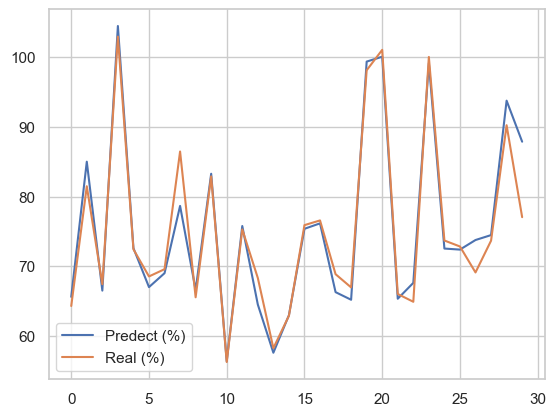

In [93]:
accuracy = pd.DataFrame(zip(y_pred[0:30],y_test[0:30]),columns=['Predect (%)', 'Real (%)'])
accuracy.plot()